In [34]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [2]:
os.getcwd()

'/gpfs/group/jtw13/default/gbt_2020/2021'

In [3]:
os.chdir('/gpfs/group/jtw13/default/gbt_2020/2021/S_band/splice_no_overlap_ordered/')
csvs = sorted(glob.glob('*f?_*.csv'))
df_f1_s = pd.read_csv(csvs[0])
df_f2_s = pd.read_csv(csvs[1])
df_f3_s = pd.read_csv(csvs[2])
df_dats_s = pd.read_csv('concat_dats.csv')
searchfile = open("./info/drift_rates.txt").readlines()
BaryDriftRates_s=[]
for line in searchfile:
    BaryDriftRates_s.append(float(line.split('Rate: ')[1].split(' Hz/s')[0]))

# os.chdir('C:\\Users\\sirsp\\Jupyter_Notebook\\SETI_Class_Project\\Redo\\C_band')
# csvs = sorted(glob.glob('*.csv'))
# df_f1_c = pd.read_csv(csvs[0])
# df_f2_c = pd.read_csv(csvs[1])
# # df_f3_c = pd.read_csv(csvs[2])
# df_dats_c = pd.read_csv('concat_dats.csv')
# searchfile = open(".\\info\\drift_rates.txt").readlines()
# BaryDriftRates_c=[]
# for line in searchfile:
#     BaryDriftRates_c.append(float(line.split('Rate: ')[1].split(' Hz/s')[0]))

os.chdir('/gpfs/group/jtw13/default/gbt_2020/2021/L_band/splice_no_overlap_ordered/')
csvs = sorted(glob.glob('*.csv'))
df_f1_L = pd.read_csv(csvs[0])
df_f2_L = pd.read_csv(csvs[1])
df_f3_L = pd.read_csv(csvs[2])
df_dats_L = pd.read_csv('concat_dats.csv')
searchfile = open("./info/drift_rates.txt").readlines()
BaryDriftRates_L=[]
for line in searchfile:
    BaryDriftRates_L.append(float(line.split('Rate: ')[1].split(' Hz/s')[0]))

In [4]:
BaryDriftRates_L,BaryDriftRates_s#,BaryDriftRates_c

([0.124, 0.11, 0.125, 0.11, 0.127, 0.111],
 [0.18, 0.16, 0.18, 0.16, 0.18, 0.16])

In [5]:
# colorblind color palette: Zesty

zOrange = '#F5793A'
zPurple = '#A95AA1'
zSkyBlue = '#85C0F9'
zNavy = '#0F2080'

main_color=zSkyBlue
secondary_color=zOrange
tick_color=zNavy

tick_label_size=16
axis_label_size=20

In [6]:
def create(limit, diff):
    lst = np.arange(diff, limit, diff)
    if (lst[-1] != limit):
        lst = np.r_[lst, limit]
          
    return np.r_[-lst[::-1], 0, lst].tolist()

In [7]:
def binarray(limit, diff):
    length = int(((limit/diff)*2)+1)    
    list = [-limit+i*diff for i in range(length)]
    return list 

In [8]:
def binit(limit, diff):
    pos = np.arange(0,abs(limit),diff)
    neg = -np.flip(pos)
    binarray = np.r_[neg[:-1],pos]
    return binarray

In [9]:
def grouper(iterable,diff):
    prev = None
    group = []
    for item in iterable:
        if prev is None or abs(item - prev) <= diff:
            group.append(item)
        else:
            yield group
            group = [item]
        prev = item
    if group:
        yield group

In [10]:
df_f1_s[0:2]

,Unnamed: 0,TopHitNum,DriftRate,SNR,Freq,ChanIndx,FreqStart,FreqEnd,CoarseChanNum,FullNumHitsInRange,...,DEC,DELTAT,DELTAF,max_drift_rate,obs_length,Hit_ID,status,in_n_ons,RFI_in_range,delta_t
0,0,1,0.105231,329.082520,3150.900409,202019,3150.900507,3150.900317,0,264026,...,60d52m06.96s,18.253611,-2.793968,0.234937,292.057776,NaN,on_table_1,NaN,NaN,0.0
1,1,2,0.181763,24.834595,3150.893899,204349,3150.893997,3150.893807,0,264026,...,60d52m06.96s,18.253611,-2.793968,0.234937,292.057776,NaN,on_table_1,NaN,NaN,0.0


# ON Source Concatenated Dats
## S band

In [11]:
data=df_dats_s
data.head()

,Unnamed: 0,# Top_Hit_#,Drift_Rate,SNR,Uncorrected_Frequency,Corrected_Frequency,Index,freq_start,freq_end,SEFD,SEFD_freq,Coarse_Channel_Number,Full_number_of_hits,Unnamed: 12
0,1,1,0.105231,329.082520,3150.900409,3150.900409,202019.0,3150.900507,3150.900317,0.0,0.0,0.0,264026.0,NaN
1,2,2,0.181763,24.834595,3150.893899,3150.893899,204349.0,3150.893997,3150.893807,0.0,0.0,0.0,264026.0,NaN
2,3,3,0.019133,2944.756104,3150.600278,3150.600278,309440.0,3150.600376,3150.600186,0.0,0.0,0.0,264026.0,NaN
3,4,4,0.200896,1161.691040,3150.595920,3150.595920,311000.0,3150.596018,3150.595828,0.0,0.0,0.0,264026.0,NaN
4,5,5,-0.086098,276.429718,3150.488204,3150.488204,349553.0,3150.488302,3150.488112,0.0,0.0,0.0,264026.0,NaN


In [12]:
data["freq_start "][0]

3150.900507

In [13]:
diffs=[(data["freq_start "][x]-data["freq_end "][x])/2*10**6 for x in range(len(data))]
avg=sum(diffs)/len(data)
print(avg,max(diffs),min(diffs))

87.96529996199186 95.00000010120857 80.9999999091815


In [14]:
df_temp=df_dats_s
df_temp=df_temp[df_temp["SNR "] >10].reset_index(drop=True)
max_drift = -0.185
min_drift = -0.175
DR_data=df_temp[(df_temp["Drift_Rate "] < min_drift) & (df_temp["Drift_Rate "]> max_drift)].reset_index(drop=True)
print(f'All concatenated data in DR range: \t\t\t\t\t\t{len(DR_data)}')
min_sensitivity=1800
max_sensitivity=2800
min_notch=2300
max_notch=2360
print(f'All concatenated hits: \t\t\t\t\t\t\t\t\t{len(df_temp)}')
Good_data = df_temp[(df_temp["freq_end "] > min_sensitivity) & (df_temp["freq_start "] < max_sensitivity)].reset_index(drop=True)
print(f'All concatenated hits within GBT freqs: \t\t\t\t\t\t{len(Good_data)}')
Good_data = Good_data[~(Good_data["Corrected_Frequency "].between(min_notch,max_notch))].reset_index(drop=True)
print(f'All concatenated hits within GBT freqs excluding notch filter: \t{len(Good_data)}')
print(f'All concatenated data in DR range in sensitive zones: \t\t\t{len(Good_data[(Good_data["Drift_Rate "] < min_drift) & (Good_data["Drift_Rate "]> max_drift)].reset_index(drop=True))}')


All concatenated data in DR range: 						320
All concatenated hits: 									62608
All concatenated hits within GBT freqs: 						58909
All concatenated hits within GBT freqs excluding notch filter: 	58851
All concatenated data in DR range in sensitive zones: 			298


In [15]:
df_temp=df_f1_s
max_drift = -0.19
min_drift = -0.17
DR_data=df_temp[(df_temp["DriftRate"] < min_drift) & (df_temp["DriftRate"]> max_drift)].reset_index(drop=True)
print(len(DR_data))
min_sensitivity=1800
max_sensitivity=2800
min_notch=2300
max_notch=2360
print(len(df_temp))
Good_data = df_temp[(df_temp["FreqEnd"] > min_sensitivity) & (df_temp["FreqStart"] < max_sensitivity)].reset_index(drop=True)
print(len(Good_data))
Good_data = Good_data[~(Good_data["Freq"].between(min_notch,max_notch))].reset_index(drop=True)
print(len(Good_data))
len(Good_data[(Good_data["DriftRate"] < min_drift) & (Good_data["DriftRate"]> max_drift)].reset_index(drop=True))

122
24298
23589
23563


105

In [16]:
df_temp=df_f2_s
max_drift = -0.19
min_drift = -0.17
DR_data=df_temp[(df_temp["DriftRate"] < min_drift) & (df_temp["DriftRate"]> max_drift)].reset_index(drop=True)
print(len(DR_data))
min_sensitivity=1800
max_sensitivity=2800
min_notch=2300
max_notch=2360
print(len(df_temp))
Good_data = df_temp[(df_temp["FreqEnd"] > min_sensitivity) & (df_temp["FreqStart"] < max_sensitivity)].reset_index(drop=True)
print(len(Good_data))
Good_data = Good_data[~(Good_data["Freq"].between(min_notch,max_notch))].reset_index(drop=True)
print(len(Good_data))
len(Good_data[(Good_data["DriftRate"] < min_drift) & (Good_data["DriftRate"]> max_drift)].reset_index(drop=True))

16
2226
2170
2169


13

In [17]:
df_temp=df_f3_s
max_drift = -0.19
min_drift = -0.17
DR_data=df_temp[(df_temp["DriftRate"] < min_drift) & (df_temp["DriftRate"]> max_drift)].reset_index(drop=True)
print(len(DR_data))
min_sensitivity=1800
max_sensitivity=2800
min_notch=2300
max_notch=2360
print(len(df_temp))
Good_data = df_temp[(df_temp["FreqEnd"] > min_sensitivity) & (df_temp["FreqStart"] < max_sensitivity)].reset_index(drop=True)
print(len(Good_data))
Good_data = Good_data[~(Good_data["Freq"].between(min_notch,max_notch))].reset_index(drop=True)
print(len(Good_data))
len(Good_data[(Good_data["DriftRate"] < min_drift) & (Good_data["DriftRate"]> max_drift)].reset_index(drop=True))

0
6
6
6


0

0.0005277917997719513


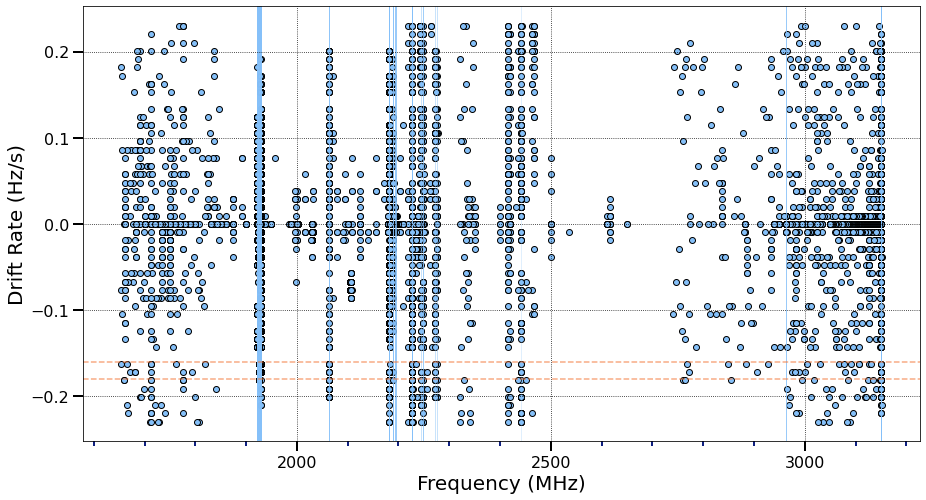

In [18]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(15,8))

data=df_dats_s
Z=[(data["freq_start "][x]+data["freq_end "][x])/2 for x in range(len(data))]
df_dats_s["Freq"]=Z
s_mask_min=[]
s_mask_max=[]
X=data.Freq
Y=data["Drift_Rate "]
BaryDrifts = [-d for d in BaryDriftRates_s]
plt.scatter(X,Y,color=main_color,edgecolors='k')
for y in BaryDrifts:
    plt.axhline(y=y, color=secondary_color, linestyle='--',alpha=0.25)

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
numbers = [float(F) for F in X]
clumps = dict(enumerate(grouper(numbers,avg*6/10**6), 0))
for c in clumps:
    if len(clumps[c])>=5:
        s_mask_min.append(min(clumps[c]))
        s_mask_max.append(max(clumps[c]))
        x1 = min(clumps[c])
        x2 = max(clumps[c])
        ax.axvspan(x1, x2, alpha=0.25, color=main_color)

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
# fig.suptitle('C Band, SNR Minimum 10, Filter Threshold 1, Drift Factor 1.1', fontsize=20, y=0.92)
print(avg*6/10**6)
plt.show()

490


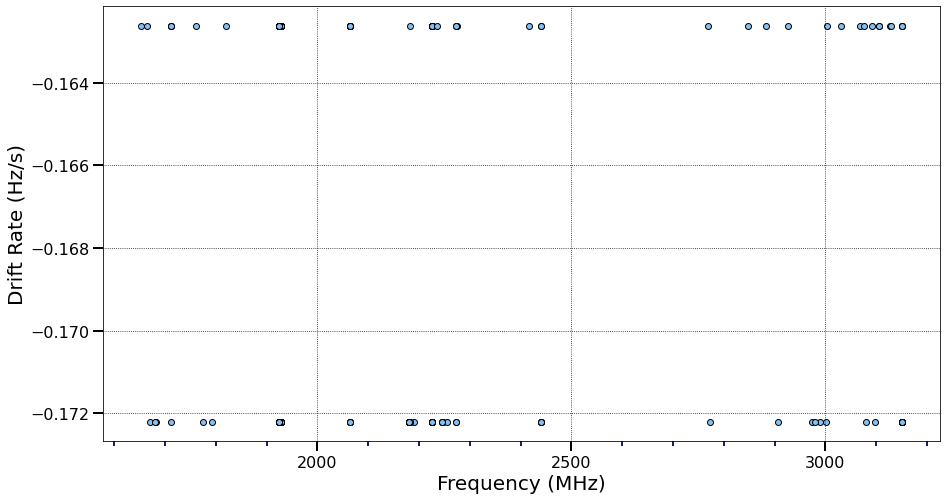

In [19]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(15,8))

BaryDrifts = [-d for d in BaryDriftRates_s]
max_drift = min(BaryDrifts)
min_drift = max(BaryDrifts)
df_temp = df_dats_s

data=df_temp[(df_temp["Drift_Rate "] < min_drift) & (df_temp["Drift_Rate "]> max_drift)].reset_index(drop=True)
X=data.Freq
Y=data["Drift_Rate "]
plt.scatter(X,Y,color=main_color,marker='o',edgecolors='k')

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
# ax.set_yscale('log')
# ax.set_ylim(0.9,ymax)

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
# fig.suptitle('C Band, SNR Minimum 10, Filter Threshold 1, Drift Factor 1.1', fontsize=20, y=0.92)
print(len(data))
plt.show()

In [20]:
df_temp = df_dats_s
data=df_temp[(df_temp["Drift_Rate "] < min_drift) & (df_temp["Drift_Rate "]> max_drift)].reset_index(drop=True)
X=data.Freq
numbers = [float(F) for F in X]
clumps = dict(enumerate(grouper(numbers,0.1), 0))
clumps
print('\tf_start\t\t\tf_stop\t\t\tDrift Rate')
f_starts=[]
f_stops=[]
DRs=[]
for x in range(len(data)):
    DR=data["Drift_Rate "].iloc[x]
    f_mid=data.Freq.iloc[x]
    max_diff=abs(DR*300*6)/10**6
    f_starts.append(f_mid-max_diff)
    f_stops.append(f_mid+max_diff)
    DRs.append(DR)
    print(f'    {f_mid-max_diff}\t    {f_mid+max_diff}\t\t{DR}')

	f_start			f_stop			Drift Rate
    3150.003859266	    3150.004444734		-0.16263
    3149.9961202659997	    3149.996705734		-0.16263
    3126.562218266	    3126.562803734		-0.16263
    3106.054406266	    3106.0549917340004		-0.16263
    3067.968463266	    3067.9690487340004		-0.16263
    3003.515338266	    3003.5159237340004		-0.16263
    2974.2184460454	    2974.2190659546004		-0.172197
    2769.140340266	    2769.140925734		-0.16263
    2441.0489820453995	    2441.0496019546		-0.172197
    2226.3746010453997	    2226.3752209546		-0.172197
    1928.6271150454002	    1928.6277349546		-0.172197
    1928.6269140453999	    1928.6275339545998		-0.172197
    1928.626833266	    1928.6274187339998		-0.16263
    1928.6267160454001	    1928.6273359546		-0.172197
    1928.6266150454	    1928.6272349546		-0.172197
    1928.6265150453999	    1928.6271349545998		-0.172197
    1928.626233266	    1928.626818734		-0.16263
    1928.6261150454	    1928.6267349546		-0.172197
    1928.6257160454	    1928.62

## L band

In [21]:
df_temp=df_dats_L
df_temp=df_temp[df_temp["SNR "] >10].reset_index(drop=True)
max_drift = -0.13
min_drift = -0.12
DR_data=df_temp[(df_temp["Drift_Rate "] < min_drift) & (df_temp["Drift_Rate "]> max_drift)].reset_index(drop=True)
print(f'All concatenated data in DR range: \t\t\t\t\t\t{len(DR_data)}')
min_sensitivity=1070
max_sensitivity=1870
min_notch=1250
max_notch=1350
print(f'All concatenated hits: \t\t\t\t\t\t\t\t\t{len(df_temp)}')
Good_data = df_temp[(df_temp["freq_end "] > min_sensitivity) & (df_temp["freq_start "] < max_sensitivity)].reset_index(drop=True)
print(f'All concatenated hits within GBT freqs: \t\t\t\t\t\t{len(Good_data)}')
Good_data = Good_data[~(Good_data["Corrected_Frequency "].between(min_notch,max_notch))].reset_index(drop=True)
print(f'All concatenated hits within GBT freqs excluding notch filter: \t{len(Good_data)}')
print(f'All concatenated data in DR range in sensitive zones: \t\t\t{len(Good_data[(Good_data["Drift_Rate "] < min_drift) & (Good_data["Drift_Rate "]> max_drift)].reset_index(drop=True))}')

All concatenated data in DR range: 						2291
All concatenated hits: 									198970
All concatenated hits within GBT freqs: 						188779
All concatenated hits within GBT freqs excluding notch filter: 	176198
All concatenated data in DR range in sensitive zones: 			2232


In [22]:
df_temp=df_f1_L
max_drift = -0.13
min_drift = -0.12
DR_data=df_temp[(df_temp["DriftRate"] < min_drift) & (df_temp["DriftRate"]> max_drift)].reset_index(drop=True)
print(len(DR_data))
min_sensitivity=1070
max_sensitivity=1870
min_notch=1250
max_notch=1350
print(len(df_temp))
Good_data = df_temp[(df_temp["FreqEnd"] > min_sensitivity) & (df_temp["FreqStart"] < max_sensitivity)].reset_index(drop=True)
print(len(Good_data))
Good_data = Good_data[~(Good_data["Freq"].between(min_notch,max_notch))].reset_index(drop=True)
print(len(Good_data))
len(Good_data[(Good_data["DriftRate"] < min_drift) & (Good_data["DriftRate"]> max_drift)].reset_index(drop=True))

517
27995
26768
23306


492

In [23]:
df_temp=df_f2_L
max_drift = -0.13
min_drift = -0.12
DR_data=df_temp[(df_temp["DriftRate"] < min_drift) & (df_temp["DriftRate"]> max_drift)].reset_index(drop=True)
print(len(DR_data))
min_sensitivity=1070
max_sensitivity=1870
min_notch=1250
max_notch=1350
print(len(df_temp))
Good_data = df_temp[(df_temp["FreqEnd"] > min_sensitivity) & (df_temp["FreqStart"] < max_sensitivity)].reset_index(drop=True)
print(len(Good_data))
Good_data = Good_data[~(Good_data["Freq"].between(min_notch,max_notch))].reset_index(drop=True)
print(len(Good_data))
len(Good_data[(Good_data["DriftRate"] < min_drift) & (Good_data["DriftRate"]> max_drift)].reset_index(drop=True))

377
9929
9812
9585


371

In [24]:
df_temp=df_f3_L
max_drift = -0.13
min_drift = -0.12
DR_data=df_temp[(df_temp["DriftRate"] < min_drift) & (df_temp["DriftRate"]> max_drift)].reset_index(drop=True)
print(len(DR_data))
min_sensitivity=1070
max_sensitivity=1870
min_notch=1250
max_notch=1350
print(len(df_temp))
Good_data = df_temp[(df_temp["FreqEnd"] > min_sensitivity) & (df_temp["FreqStart"] < max_sensitivity)].reset_index(drop=True)
print(len(Good_data))
Good_data = Good_data[~(Good_data["Freq"].between(min_notch,max_notch))].reset_index(drop=True)
print(len(Good_data))
len(Good_data[(Good_data["DriftRate"] < min_drift) & (Good_data["DriftRate"]> max_drift)].reset_index(drop=True))

1
3
3
3


1

0.0005277917997719513


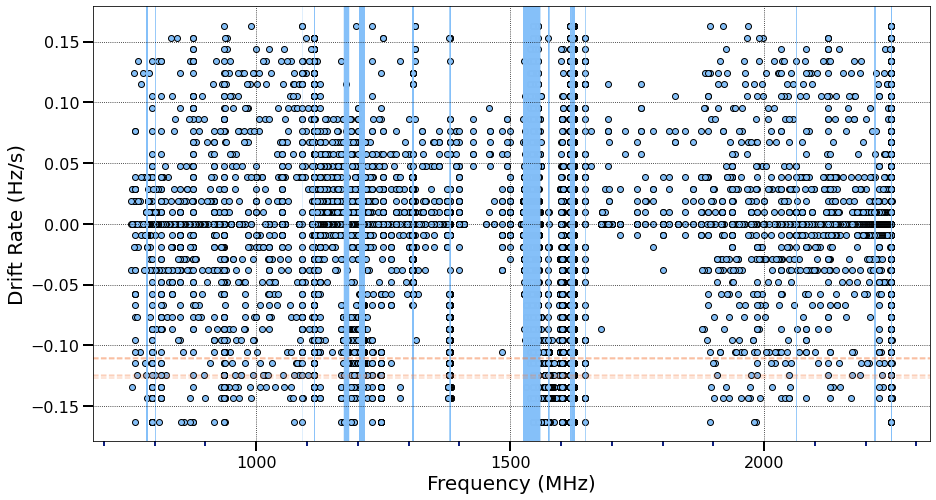

In [25]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(15,8))

data=df_dats_L
Z=[(data["freq_start "][x]+data["freq_end "][x])/2 for x in range(len(data))]
df_dats_L["Freq"]=Z
L_mask_min=[]
L_mask_max=[]
X=data.Freq
Y=data["Drift_Rate "]
BaryDrifts = [-d for d in BaryDriftRates_L]
plt.scatter(X,Y,color=main_color,edgecolors='k')
for y in BaryDrifts:
    plt.axhline(y=y, color=secondary_color, linestyle='--',alpha=0.25)

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
numbers = [float(F) for F in X]
clumps = dict(enumerate(grouper(numbers,avg*6/10**6), 0))
for c in clumps:
    if len(clumps[c])>=5:
        L_mask_min.append(min(clumps[c]))
        L_mask_max.append(max(clumps[c]))
        x1 = min(clumps[c])
        x2 = max(clumps[c])
        ax.axvspan(x1, x2, alpha=0.25, color=main_color)

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
# fig.suptitle('C Band, SNR Minimum 10, Filter Threshold 1, Drift Factor 1.1', fontsize=20, y=0.92)
print(avg*6/10**6)
plt.show()

3963


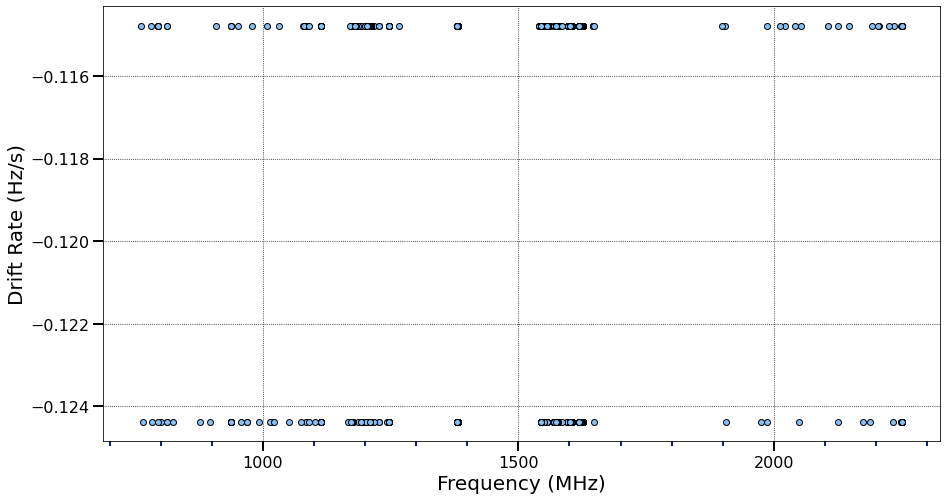

In [26]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(15,8))

BaryDrifts = [-d for d in BaryDriftRates_L]
max_drift = min(BaryDrifts)
min_drift = max(BaryDrifts)
df_temp = df_dats_L

data=df_temp[(df_temp["Drift_Rate "] < min_drift) & (df_temp["Drift_Rate "]> max_drift)].reset_index(drop=True)
X=data.Freq
Y=data["Drift_Rate "]
plt.scatter(X,Y,color=main_color,marker='o',edgecolors='k')

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
# ax.set_yscale('log')
# ax.set_ylim(0.9,ymax)

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
# fig.suptitle('C Band, SNR Minimum 10, Filter Threshold 1, Drift Factor 1.1', fontsize=20, y=0.92)
print(len(data))
plt.show()

In [27]:
df_temp = df_dats_L
data=df_temp[(df_temp["Drift_Rate "] < min_drift) & (df_temp["Drift_Rate "]> max_drift)].reset_index(drop=True)
X=data.Freq
numbers = [float(F) for F in X]
clumps = dict(enumerate(grouper(numbers,0.1), 0))
clumps
print('\tf_start\t\t\tf_stop\t\t\tDrift Rate')
f_starts=[]
f_stops=[]
DRs=[]
for x in range(len(data)):
    DR=data["Drift_Rate "].iloc[x]
    f_mid=data.Freq.iloc[x]
    max_diff=abs(DR*300*6)/10**6
    f_starts.append(f_mid-max_diff)
    f_stops.append(f_mid+max_diff)
    DRs.append(DR)
    print(f'    {f_mid-max_diff}\t    {f_mid+max_diff}\t\t{DR}')

	f_start			f_stop			Drift Rate
    2250.0038721447995	    2250.0043198552		-0.124364
    2250.0030871448	    2250.0035348552		-0.124364
    2250.0021176448	    2250.0025653552		-0.124364
    2249.8922086447997	    2249.8926563552		-0.124364
    2249.4037946447997	    2249.4042423552		-0.124364
    1626.1201108636	    1626.1205241364		-0.114798
    1626.1166938636	    1626.1171071364		-0.114798
    1626.1078818636	    1626.1082951363999		-0.114798
    1626.1078038636	    1626.1082171364		-0.114798
    1626.1060628636	    1626.1064761364		-0.114798
    1626.1001311448001	    1626.1005788552		-0.124364
    1626.1000613636002	    1626.1004746364001		-0.114798
    1626.0839373636	    1626.0843506364		-0.114798
    1626.0818503636	    1626.0822636364		-0.114798
    1626.0772853636	    1626.0776986363999		-0.114798
    1626.0754351448002	    1626.0758828552		-0.124364
    1625.6156401448	    1625.6160878551998		-0.124364
    1625.5368868636	    1625.5373001364		-0.114798
    1625.2421988636	 

In [28]:
df_f1_L

,Unnamed: 0,TopHitNum,DriftRate,SNR,Freq,ChanIndx,FreqStart,FreqEnd,CoarseChanNum,FullNumHitsInRange,...,DEC,DELTAT,DELTAF,max_drift_rate,obs_length,Hit_ID,status,in_n_ons,RFI_in_range,delta_t
0,0,1,-0.133931,385.369446,2250.900566,201963,2250.900633,2250.900504,0,176552,...,60d52m06.96s,18.253611,-2.793968,0.160880,292.057776,NaN,on_table_1,NaN,NaN,0.0
1,1,2,0.086098,25.172770,2250.893986,204318,2250.894053,2250.893924,0,176552,...,60d52m06.96s,18.253611,-2.793968,0.160880,292.057776,NaN,on_table_1,NaN,NaN,0.0
2,2,3,-0.086098,3580.592285,2250.600379,309404,2250.600446,2250.600317,0,176552,...,60d52m06.96s,18.253611,-2.793968,0.160880,292.057776,NaN,on_table_1,NaN,NaN,0.0
3,3,4,0.124364,1156.282837,2250.595984,310977,2250.596051,2250.595923,0,176552,...,60d52m06.96s,18.253611,-2.793968,0.160880,292.057776,NaN,on_table_1,NaN,NaN,0.0
4,4,5,0.038266,312.307648,2250.488408,349480,2250.488475,2250.488346,0,176552,...,60d52m06.96s,18.253611,-2.793968,0.160880,292.057776,NaN,on_table_1,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27990,100203,33858,-0.114798,11.715437,781.252046,873081,781.252116,781.251982,501,16543,...,60d52m06.6s,18.253611,-2.793968,0.164531,292.057776,NaN,on_table_3,NaN,NaN,1398.0
27991,100204,33859,0.038266,31.733366,762.013215,418895,762.013284,762.013150,508,851,...,60d52m06.6s,18.253611,-2.793968,0.164531,292.057776,NaN,on_table_3,NaN,NaN,1398.0
27992,100205,33860,0.028699,15.494378,762.011438,419531,762.011508,762.011373,508,851,...,60d52m06.6s,18.253611,-2.793968,0.164531,292.057776,NaN,on_table_3,NaN,NaN,1398.0
27993,100206,33861,-0.057399,36.067932,761.964049,436492,761.964119,761.963985,508,851,...,60d52m06.6s,18.253611,-2.793968,0.164531,292.057776,NaN,on_table_3,NaN,NaN,1398.0


# Masks

## S band mask

In [29]:
clumps[c],x1,x2

KeyError: 42316

In [30]:
data=df_f1_s
data.SNR.max()

322613.3125

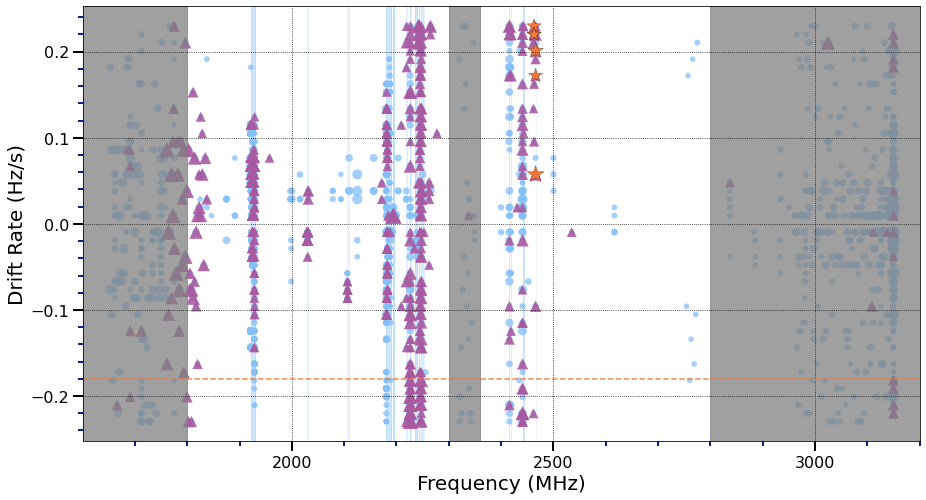

2.8 2800


In [31]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_s
s_mask_min=[]
s_mask_max=[]
X=data.Freq
Y=data.DriftRate
df_temp = df_f1_s
df_temp2 = df_f2_s
df_temp3 = df_f3_s
data=df_temp[(df_temp.SNR > 10)].reset_index(drop=True)
data2=df_temp2[(df_temp2.SNR > 10)].reset_index(drop=True)
data3=df_temp3[(df_temp3.SNR > 10)].reset_index(drop=True)
X=data.Freq
X2=data2.Freq
X3=data3.Freq
Y=data.DriftRate
Y2=data2.DriftRate
Y3=data3.DriftRate
size = [int(snr*30) for snr in np.log10(data.SNR)]
size2 = [int(snr*3*30) for snr in np.log10(data2.SNR)]
size3 = [int(snr*6*30) for snr in np.log10(data3.SNR)]
plt.scatter(X,Y,color=main_color,marker='o',s=size,edgecolors='grey',label='Filter Threshold 1',linewidths=0,alpha=0.75)
plt.scatter(X2,Y2,color=zPurple,marker='^',s=size2,edgecolors='grey',label='Filter Threshold 2',linewidths=0,alpha=0.9)
plt.scatter(X3,Y3,color=zOrange,marker='*',s=size3,edgecolors='k',label='Filter Threshold 3',linewidths=0.25)
BaryDrifts = [-d for d in BaryDriftRates_s]
# size = [int(snr)*30 for snr in np.log10(data.SNR)]
# plt.scatter(X,Y,color=main_color,s=size,edgecolors='grey',linewidth=0)
for i in range(0,len(BaryDrifts),2):
    y=BaryDrifts[i]
    plt.axhline(y=y, color=secondary_color, linestyle='--',alpha=0.4)

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
numbers = [float(F) for F in data.Freq]
min_sensitivity=1800
max_sensitivity=2800
min_notch=2300
max_notch=2360
clumps = dict(enumerate(grouper(numbers,max_sensitivity/1000), 0))
for c in clumps:
    if len(clumps[c])>=5:
        s_mask_min.append(min(clumps[c]))
        s_mask_max.append(max(clumps[c]))
        x1 = min(clumps[c])
        x2 = max(clumps[c])
        if x1 > min_sensitivity and x2 < max_sensitivity:
            if x2 < min_notch or x1 > max_notch:
                ax.axvspan(x1, x2, alpha=0.15, color=main_color,zorder=-1)
x_lim = ax.get_xlim()
greyed_out=0.75
ax.axvspan(x_lim[0],min_sensitivity,alpha=greyed_out,color='grey')
ax.axvspan(max_sensitivity,x_lim[1],alpha=greyed_out,color='grey')
ax.axvspan(min_notch,max_notch,alpha=greyed_out,color='grey')
ax.set_xlim(x_lim[0],x_lim[1])
ax.set_xlim(1600,3200)

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
plt.savefig('/gpfs/group/jtw13/default/gbt_2020/2021/plots/S_DRvFreq.pdf',format='pdf',bbox_inches='tight')
# fig.suptitle('C Band, SNR Minimum 10, Filter Threshold 1, Drift Factor 1.1', fontsize=20, y=0.92)
plt.show()
print(max_sensitivity/1000, max_sensitivity)

In [ ]:
# S-band Comb Filter
# F1

max_mask = s_mask_max
min_mask = s_mask_min

df_temp = df_f1_s

for m,mask in enumerate(max_mask):
    df_temp = df_temp[(df_temp.Freq < min_mask[m]) | (df_temp.Freq > mask)]

df_f1_s_mask = df_temp 

# F2

df_temp = df_f2_s

for m,mask in enumerate(max_mask):
    df_temp = df_temp[(df_temp.Freq < min_mask[m]) | (df_temp.Freq > mask)]

df_f2_s_mask = df_temp

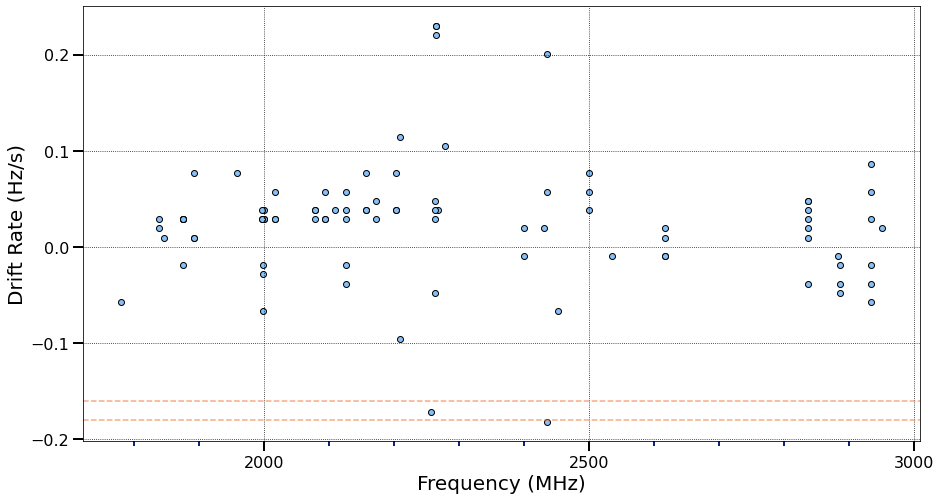

In [ ]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_s_mask
BaryDrifts = [-d for d in BaryDriftRates_s]
X=data.Freq
Y=data.DriftRate
plt.scatter(X,Y,color=main_color,edgecolors='k')
for y in BaryDrifts:
    plt.axhline(y=y, color=secondary_color, linestyle='--',alpha=0.25)

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
# ax.set_yscale('log')
# ax.set_ylim(0.9,ymax)

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
# fig.suptitle('C Band, SNR Minimum 10, Filter Threshold 1, Drift Factor 1.1', fontsize=20, y=0.92)
plt.show()

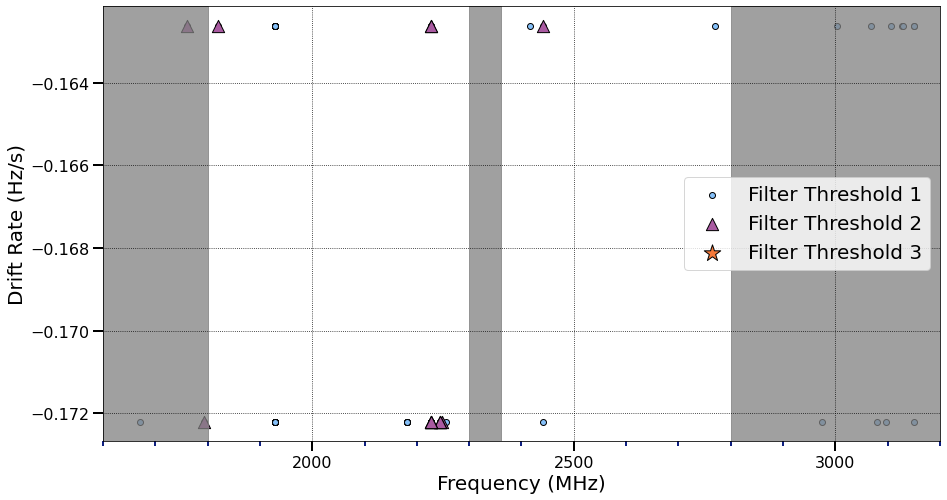

In [ ]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(15,8))

BaryDrifts = [-d for d in BaryDriftRates_s]
max_drift = min(BaryDrifts)
min_drift = max(BaryDrifts)
# max_drift = -.18
# min_drift = -.17
df_temp = df_f1_s
df_temp2 = df_f2_s
df_temp3 = df_f3_s

data=df_temp[(df_temp.DriftRate < min_drift) & (df_temp.DriftRate > max_drift)].reset_index(drop=True)
data2=df_temp2[(df_temp2.DriftRate < min_drift) & (df_temp2.DriftRate > max_drift)].reset_index(drop=True)
data3=df_temp3[(df_temp3.DriftRate < min_drift) & (df_temp3.DriftRate > max_drift)].reset_index(drop=True)
X=data.Freq
X2=data2.Freq
X3=data3.Freq
Y=data.DriftRate
Y2=data2.DriftRate
Y3=data3.DriftRate
plt.scatter(X,Y,color=main_color,marker='o',edgecolors='k',label='Filter Threshold 1')
plt.scatter(X2,Y2,color=zPurple,marker='^',s=150,edgecolors='k',label='Filter Threshold 2')
plt.scatter(X3,Y3,color=zOrange,marker='*',s=300,edgecolors='k',label='Filter Threshold 3')

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
# ax.set_yscale('log')
# ax.set_ylim(0.9,ymax)
x_lim = ax.get_xlim()
greyed_out=0.75
ax.axvspan(x_lim[0],1800,alpha=greyed_out,color='grey')
ax.axvspan(2800,x_lim[1],alpha=greyed_out,color='grey')
ax.axvspan(2300,2360,alpha=greyed_out,color='grey')
ax.set_xlim(x_lim[0],x_lim[1])
ax.set_xlim(1600,3200)

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
plt.legend(fontsize=axis_label_size)
# fig.suptitle('C Band, SNR Minimum 10, Filter Threshold 1, Drift Factor 1.1', fontsize=20, y=0.92)
plt.show()

In [ ]:
BaryDriftRates_s, [-BaryDriftRates_s[d] for d in range(0,len(BaryDriftRates_s),2)],1.1*min(BaryDrifts),0.9*min(BaryDrifts)

([0.18, 0.16, 0.18, 0.16, 0.18, 0.16], [-0.18, -0.18, -0.18], -0.198, -0.162)

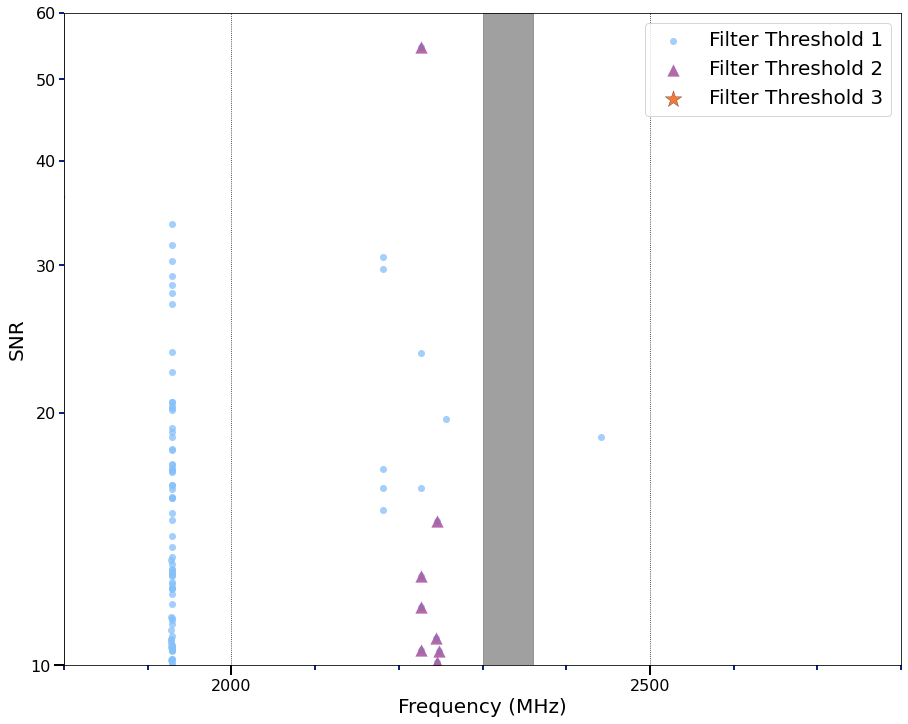

98

In [35]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(15,12))

BaryDrifts = [-BaryDriftRates_s[d] for d in range(0,len(BaryDriftRates_s),2)]
max_drift = -.18
min_drift = -.17
df_temp = df_f1_s
df_temp2 = df_f2_s
df_temp3 = df_f3_s

data=df_temp[(df_temp.DriftRate < min_drift) & (df_temp.DriftRate > max_drift) & (df_temp.SNR > 10)].reset_index(drop=True)
data2=df_temp2[(df_temp2.DriftRate < min_drift) & (df_temp2.DriftRate > max_drift) & (df_temp2.SNR > 10)].reset_index(drop=True)
data3=df_temp3[(df_temp3.DriftRate < min_drift) & (df_temp3.DriftRate > max_drift) & (df_temp3.SNR > 10)].reset_index(drop=True)
X=data.Freq
X2=data2.Freq
X3=data3.Freq
Y=data.DriftRate
Y2=data2.DriftRate
Y3=data3.DriftRate
Y=data.SNR
Y2=data2.SNR
Y3=data3.SNR
plt.scatter(X,Y,color=main_color,marker='o',s=50,edgecolors='grey',label='Filter Threshold 1',linewidths=0,alpha=0.75)
plt.scatter(X2,Y2,color=zPurple,marker='^',s=150,edgecolors='grey',label='Filter Threshold 2',linewidths=0,alpha=0.9)
plt.scatter(X3,Y3,color=zOrange,marker='*',s=300,edgecolors='k',label='Filter Threshold 3',linewidths=0.25)

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
# ax.set_yscale('log')
# ax.set_ylim(0.9,ymax)
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
greyed_out=0.75
ax.axvspan(x_lim[0],1800,alpha=greyed_out,color='grey')
ax.axvspan(2800,x_lim[1],alpha=greyed_out,color='grey')
ax.axvspan(2300,2360,alpha=greyed_out,color='grey')
ax.set_xlim(x_lim[0],x_lim[1])
ax.set_xlim(1800,2800)
ax.set_ylim(10,60)
ax.set_yscale('log')
ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.yaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
plt.ylabel('SNR', fontsize=axis_label_size)
# plt.yscale('log')
plt.legend(fontsize=axis_label_size)
plt.savefig('/gpfs/group/jtw13/default/gbt_2020/2021/plots/S_DRange.pdf',format='pdf',bbox_inches='tight')
# fig.suptitle('C Band, SNR Minimum 10, Filter Threshold 1, Drift Factor 1.1', fontsize=20, y=0.92)
plt.show()
len(X)

In [ ]:
print(f'Drift Range from {min(BaryDrifts)} to {max(BaryDrifts)} Hz/s')
print(f'{len(data)} f1 points.')
print(f'{len(data2)} f2 points.')
print(f'{len(data3)} f3 points.')

Drift Range from -0.18 to -0.18 Hz/s
259 f1 points.
30 f2 points.
0 f3 points.


In [ ]:
10*2**5

320

## L band mask

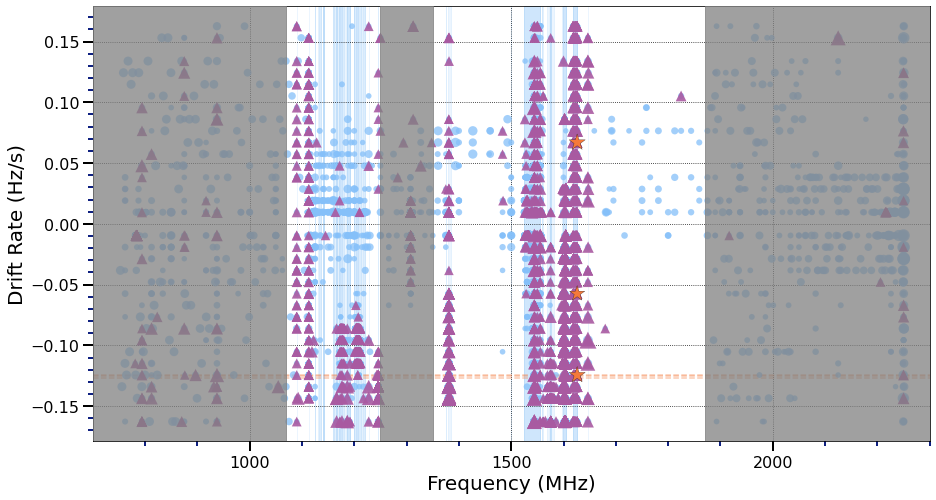

1.87 1870


In [ ]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_L
L_mask_min=[]
L_mask_max=[]
X=data.Freq
Y=data.DriftRate
df_temp = df_f1_L
df_temp2 = df_f2_L
df_temp3 = df_f3_L
numbers = [float(F) for F in data.Freq]
min_sensitivity=1070
max_sensitivity=1870
min_notch=1250
max_notch=1350
clumps = dict(enumerate(grouper(numbers,max_sensitivity/1000), 0))
for c in clumps:
    if len(clumps[c])>=5:
        L_mask_min.append(min(clumps[c]))
        L_mask_max.append(max(clumps[c]))
        x1 = min(clumps[c])
        x2 = max(clumps[c])
        if x1 > min_sensitivity and x2 < max_sensitivity:
            if x2 < min_notch or x1 > max_notch:
                ax.axvspan(x1, x2, alpha=0.15, color=main_color)

data=df_temp[(df_temp.SNR > 10)].reset_index(drop=True)
data2=df_temp2[(df_temp2.SNR > 10)].reset_index(drop=True)
data3=df_temp3[(df_temp3.SNR > 10)].reset_index(drop=True)
X=data.Freq
X2=data2.Freq
X3=data3.Freq
Y=data.DriftRate
Y2=data2.DriftRate
Y3=data3.DriftRate
size = [int(snr*30) for snr in np.log10(data.SNR)]
size2 = [int(snr*3*30) for snr in np.log10(data2.SNR)]
size3 = [int(snr*8*30) for snr in np.log10(data3.SNR)]
plt.scatter(X,Y,color=main_color,marker='o',s=size,edgecolors='grey',label='Filter Threshold 1',linewidths=0,alpha=0.75,zorder=10)
plt.scatter(X2,Y2,color=zPurple,marker='^',s=size2,edgecolors='grey',label='Filter Threshold 2',linewidths=0,alpha=0.9,zorder=15)
plt.scatter(X3,Y3,color=zOrange,marker='*',s=size3,edgecolors='k',label='Filter Threshold 3',linewidths=0.25,zorder=20)
BaryDrifts = [-d for d in BaryDriftRates_L]
alpha=1
# size = [30*int(snr) for snr in np.log10(data.SNR)]
# plt.scatter(X,Y,color=main_color,s=size,alpha=alpha,edgecolors='grey',linewidths=0.25)
for i in range(0,len(BaryDrifts),2):
    y = BaryDrifts[i]
    plt.axhline(y=y, color=secondary_color, linestyle='--',alpha=0.4)

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
x_lim = ax.get_xlim()
greyed_out=0.75
ax.axvspan(x_lim[0],min_sensitivity,alpha=greyed_out,color='grey',zorder=25)
ax.axvspan(max_sensitivity,x_lim[1],alpha=greyed_out,color='grey',zorder=25)
ax.axvspan(min_notch,max_notch,alpha=greyed_out,color='grey',zorder=25)
ax.set_xlim(x_lim[0],x_lim[1])
ax.set_xlim(700,2300)

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
plt.savefig('/gpfs/group/jtw13/default/gbt_2020/2021/plots/L_DRvFreq.pdf',format='pdf',bbox_inches='tight')
# fig.suptitle('C Band, SNR Minimum 10, Filter Threshold 1, Drift Factor 1.1', fontsize=20, y=0.92)
plt.show()
print(max_sensitivity/1000, max_sensitivity)

In [ ]:
# L-band Comb Filter
# F1

max_mask = L_mask_max
min_mask = L_mask_min

df_temp = df_f1_L

for m,mask in enumerate(max_mask):
    df_temp = df_temp[(df_temp.Freq < min_mask[m]) | (df_temp.Freq > mask)]

df_f1_L_mask = df_temp 

# F2

df_temp = df_f2_L

for m,mask in enumerate(max_mask):
    df_temp = df_temp[(df_temp.Freq < min_mask[m]) | (df_temp.Freq > mask)]

df_f2_L_mask = df_temp 

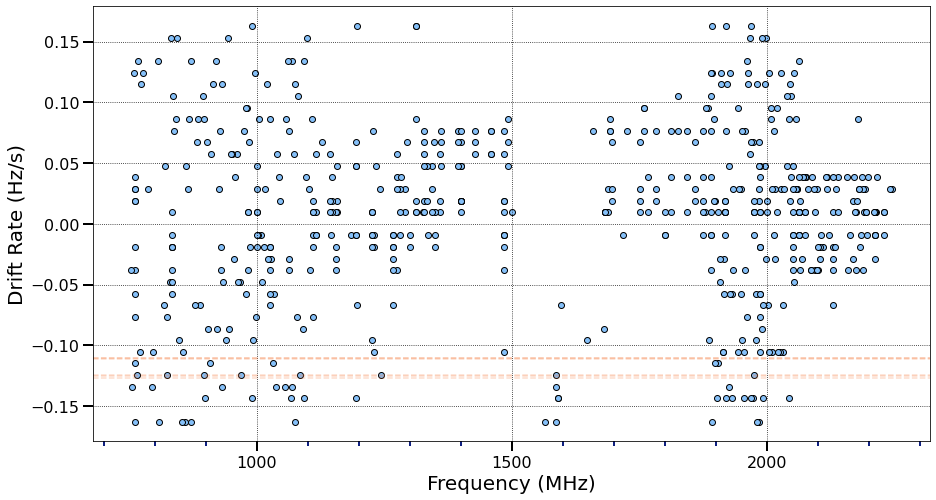

In [ ]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_L_mask
BaryDrifts = [-d for d in BaryDriftRates_L]
X=data.Freq
Y=data.DriftRate
plt.scatter(X,Y,color=main_color,edgecolors='k')
for y in BaryDrifts:
    plt.axhline(y=y, color=secondary_color, linestyle='--',alpha=0.25)

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
# ax.set_yscale('log')
# ax.set_ylim(0.9,ymax)

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
# fig.suptitle('C Band, SNR Minimum 10, Filter Threshold 1, Drift Factor 1.1', fontsize=20, y=0.92)
plt.show()

In [ ]:
BaryDriftRates_L,[-BaryDriftRates_L[d] for d in range(0,len(BaryDriftRates_L),2)],1.1*min(BaryDrifts),0.9*min(BaryDrifts)

([0.124, 0.11, 0.125, 0.11, 0.127, 0.111],
 [-0.124, -0.125, -0.127],
 -0.13970000000000002,
 -0.1143)

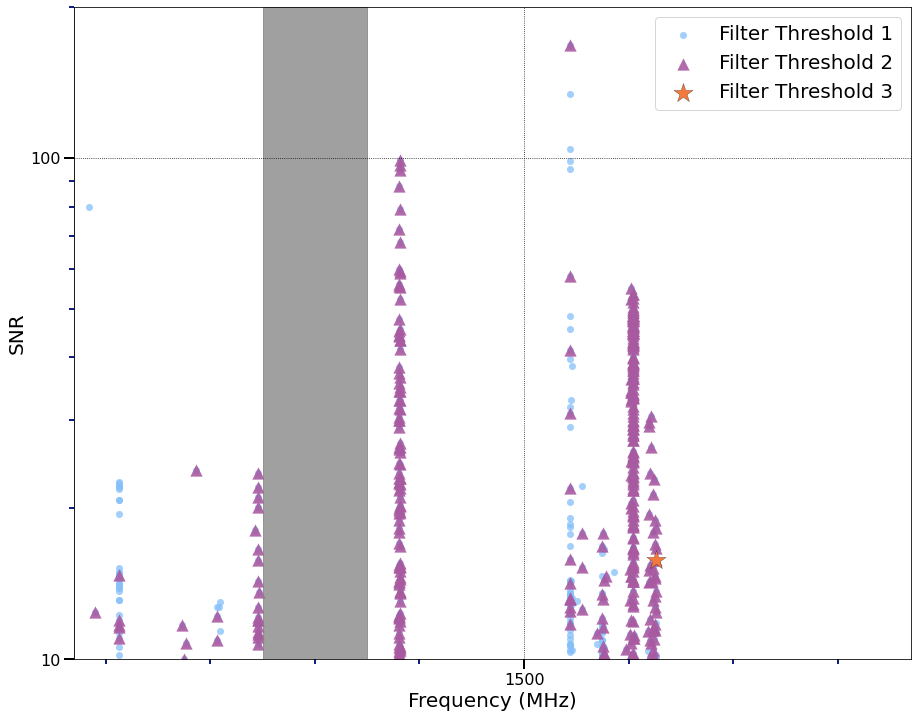

In [37]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(15,12))

BaryDrifts = [-BaryDriftRates_L[d] for d in range(0,len(BaryDriftRates_L),2)]
max_drift = -0.13
min_drift = -0.12
df_temp = df_f1_L
df_temp2 = df_f2_L
df_temp3 = df_f3_L

data=df_temp[(df_temp.DriftRate < min_drift) & (df_temp.DriftRate > max_drift) & (df_temp.SNR > 10)].reset_index(drop=True)
data2=df_temp2[(df_temp2.DriftRate < min_drift) & (df_temp2.DriftRate > max_drift) & (df_temp2.SNR > 10)].reset_index(drop=True)
data3=df_temp3[(df_temp3.DriftRate < min_drift) & (df_temp3.DriftRate > max_drift) & (df_temp3.SNR > 10)].reset_index(drop=True)
X=data.Freq
X2=data2.Freq
X3=data3.Freq
Y=data.DriftRate
Y2=data2.DriftRate
Y3=data3.DriftRate
Y=data.SNR
Y2=data2.SNR
Y3=data3.SNR
plt.scatter(X,Y,color=main_color,marker='o',s=50,edgecolors='grey',label='Filter Threshold 1',linewidths=0,alpha=0.75)
plt.scatter(X2,Y2,color=zPurple,marker='^',s=150,edgecolors='grey',label='Filter Threshold 2',linewidths=0,alpha=0.9)
plt.scatter(X3,Y3,color=zOrange,marker='*',s=400,edgecolors='k',label='Filter Threshold 3',linewidths=0.25)

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
# ax.set_yscale('log')
# ax.set_ylim(0.9,ymax)
x_lim = ax.get_xlim()
greyed_out=0.75
ax.axvspan(x_lim[0],1070,alpha=greyed_out,color='grey')
ax.axvspan(1870,x_lim[1],alpha=greyed_out,color='grey')
ax.axvspan(1250,1350,alpha=greyed_out,color='grey')
ax.set_xlim(x_lim[0],x_lim[1])
ax.set_xlim(1070,1870)
ax.set_ylim(10,200)
ax.set_yscale('log')
ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.yaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
plt.ylabel('SNR', fontsize=axis_label_size)
# plt.yscale('log')
plt.legend(fontsize=axis_label_size)
plt.savefig('/gpfs/group/jtw13/default/gbt_2020/2021/plots/L_DRange.pdf',format='pdf',bbox_inches='tight')
# fig.suptitle('C Band, SNR Minimum 10, Filter Threshold 1, Drift Factor 1.1', fontsize=20, y=0.92)
plt.show()

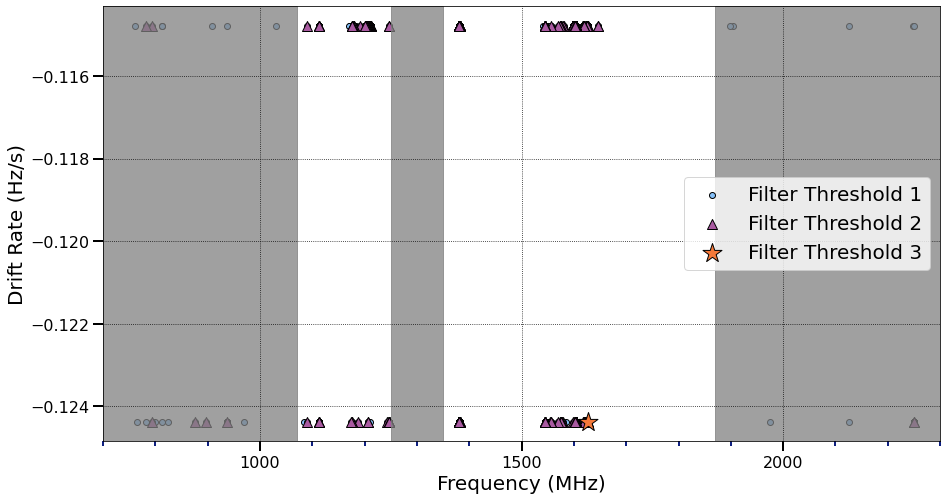

In [ ]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(15,8))

BaryDrifts = [-d for d in BaryDriftRates_L]
max_drift = min(BaryDrifts)
min_drift = max(BaryDrifts)
# max_drift = -.13
# min_drift = -.12
df_temp = df_f1_L
df_temp2 = df_f2_L
df_temp3 = df_f3_L

data=df_temp[(df_temp.DriftRate < min_drift) & (df_temp.DriftRate > max_drift)].reset_index(drop=True)
data2=df_temp2[(df_temp2.DriftRate < min_drift) & (df_temp2.DriftRate > max_drift)].reset_index(drop=True)
data3=df_temp3[(df_temp3.DriftRate < min_drift) & (df_temp3.DriftRate > max_drift)].reset_index(drop=True)
X=data.Freq
X2=data2.Freq
X3=data3.Freq
Y=data.DriftRate
Y2=data2.DriftRate
Y3=data3.DriftRate
plt.scatter(X,Y,color=main_color,marker='o',edgecolors='k',label='Filter Threshold 1')
plt.scatter(X2,Y2,color=zPurple,marker='^',s=100,edgecolors='k',label='Filter Threshold 2')
plt.scatter(X3,Y3,color=zOrange,marker='*',s=400,edgecolors='k',label='Filter Threshold 3')

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
# ax.set_yscale('log')
# ax.set_ylim(0.9,ymax)
x_lim = ax.get_xlim()
greyed_out=0.75
ax.axvspan(x_lim[0],1070,alpha=greyed_out,color='grey')
ax.axvspan(1870,x_lim[1],alpha=greyed_out,color='grey')
ax.axvspan(1250,1350,alpha=greyed_out,color='grey')
ax.set_xlim(x_lim[0],x_lim[1])
ax.set_xlim(700,2300)

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
plt.legend(fontsize=axis_label_size)
# fig.suptitle('C Band, SNR Minimum 10, Filter Threshold 1, Drift Factor 1.1', fontsize=20, y=0.92)
plt.show()

In [ ]:
print(f'Drift Range from {min(BaryDrifts)} to {max(BaryDrifts)} Hz/s')
print(f'{len(data)} f1 points.')
print(f'{len(data2)} f2 points.')
print(f'{len(data3)} f3 points.')

Drift Range from -0.127 to -0.11 Hz/s
1735 f1 points.
778 f2 points.
1 f3 points.


# Drift Rate Histograms

## S Band Drift Rate Counts

#### Filter Threshold 1:

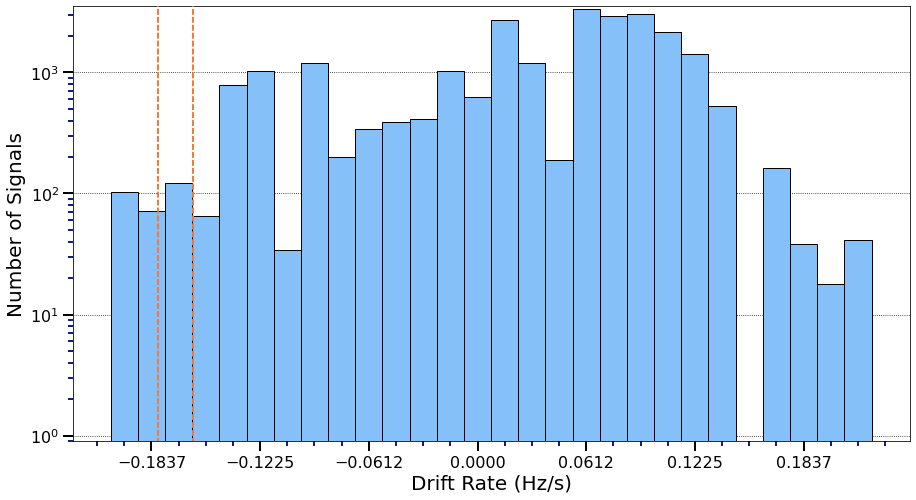

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_s.DriftRate
binwidth = (max(data)-min(data))/30
limit = max(abs(min(data)),max(data))
bins=binit(limit, binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)
ymax = int(max(ax.get_yticks()))
ymin = int(min(ax.get_yticks()))
BaryDrifts = [-d for d in BaryDriftRates_s]
plt.vlines(BaryDrifts,ymin,ymax,linestyle='dashed',color=secondary_color,zorder=50)
# for drift in BaryDrifts:
#     plt.bar(drift,ymax,width=drift*0.2,alpha=0.2,color='green',edgecolor='black')

ax.xaxis.set_major_locator(MultipleLocator(binwidth*4))
ax.xaxis.set_minor_locator(MultipleLocator(binwidth))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='y', which='major', color='black', linestyle='dotted')
ax.set_yscale('log')
ax.set_ylim(0.9,ymax)

plt.xlabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('S Band, SNR Minimum 10, Filter Threshold 1', fontsize=20, y=0.92)
plt.show()

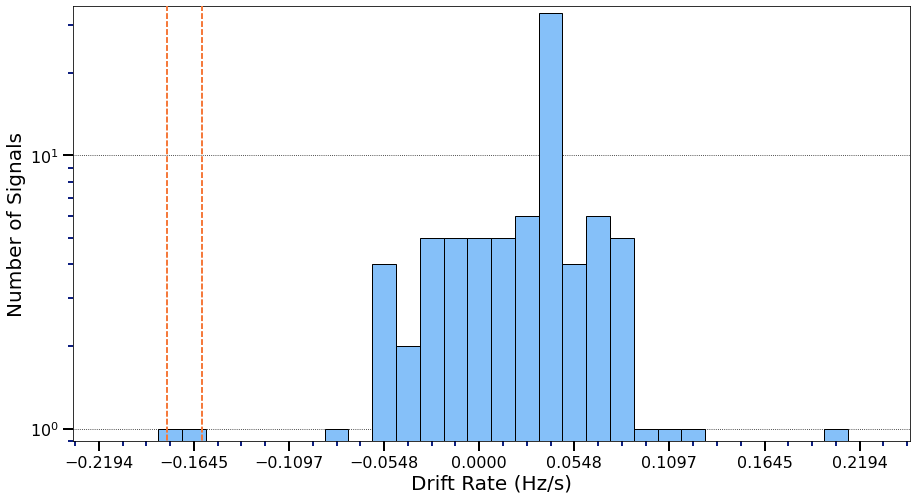

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_s_mask.DriftRate
binwidth = (max(data)-min(data))/30
limit = max(abs(min(data)),max(data))
bins=binit(limit, binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)
ymax = int(max(ax.get_yticks()))
ymin = int(min(ax.get_yticks()))
BaryDrifts = [-d for d in BaryDriftRates_s]
plt.vlines(BaryDrifts,ymin,ymax,linestyle='dashed',color=secondary_color,zorder=50)
# for drift in BaryDrifts:
#     plt.bar(drift,ymax,width=drift*0.2,alpha=0.2,color='green',edgecolor='black')

ax.xaxis.set_major_locator(MultipleLocator(binwidth*4))
ax.xaxis.set_minor_locator(MultipleLocator(binwidth))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='y', which='major', color='black', linestyle='dotted')
ax.set_yscale('log')
ax.set_ylim(0.9,ymax)

plt.xlabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('S Band, SNR Minimum 10, Filter Threshold 1, Comb RFI Removed', fontsize=20, y=0.92)
plt.show()

#### Filter Threshold 2:

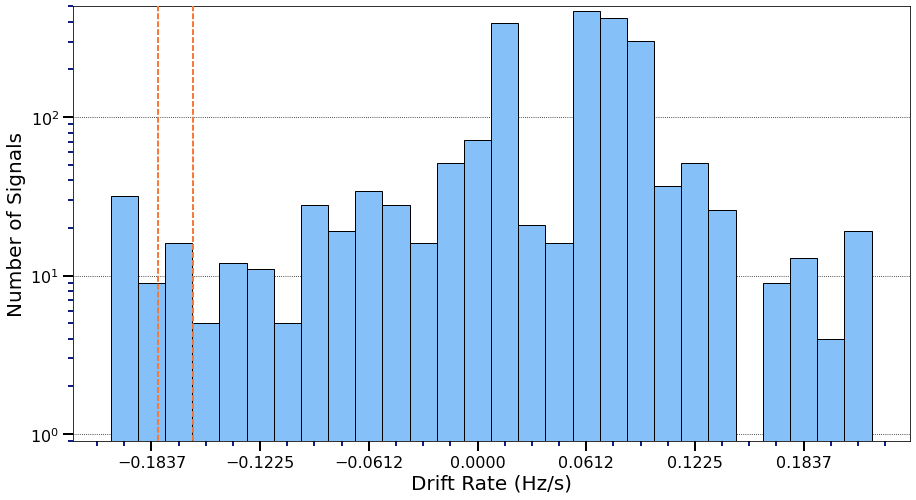

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f2_s.DriftRate
binwidth = (max(data)-min(data))/30
limit = max(abs(min(data)),max(data))
bins=binit(limit, binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)
ymax = int(max(ax.get_yticks()))
ymin = int(min(ax.get_yticks()))
BaryDrifts = [-d for d in BaryDriftRates_s]
plt.vlines(BaryDrifts,ymin,ymax,linestyle='dashed',color=secondary_color,zorder=50)
# for drift in BaryDrifts:
#     plt.bar(drift,ymax,width=drift*0.2,alpha=0.2,color='green',edgecolor='black')

ax.xaxis.set_major_locator(MultipleLocator(binwidth*4))
ax.xaxis.set_minor_locator(MultipleLocator(binwidth))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='y', which='major', color='black', linestyle='dotted')
ax.set_yscale('log')
ax.set_ylim(0.9,ymax)

plt.xlabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('S Band, SNR Minimum 10, Filter Threshold 2', fontsize=20, y=0.92)
plt.show()

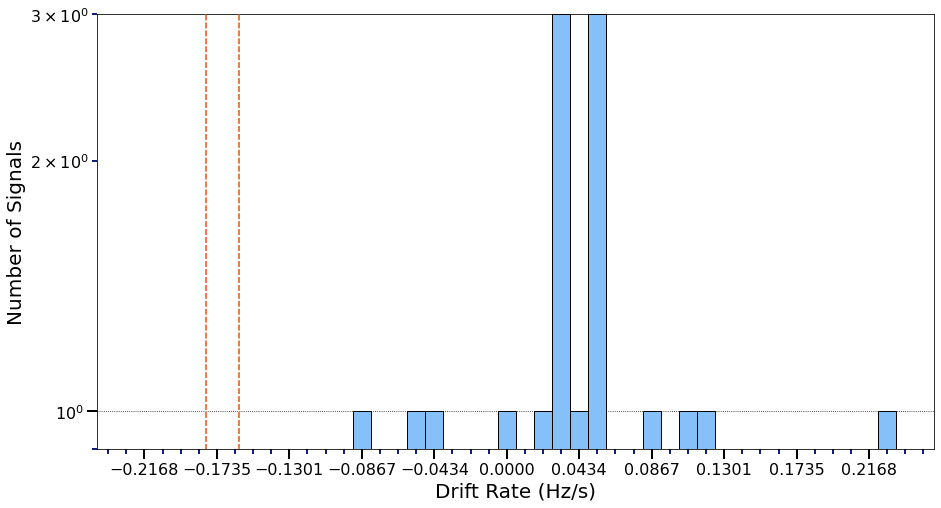

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f2_s_mask.DriftRate
binwidth = (max(data)-min(data))/30
limit = max(abs(min(data)),max(data))
bins=binit(limit, binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)
ymax = int(max(ax.get_yticks()))
ymin = int(min(ax.get_yticks()))
BaryDrifts = [-d for d in BaryDriftRates_s]
plt.vlines(BaryDrifts,ymin,ymax,linestyle='dashed',color=secondary_color,zorder=50)
# for drift in BaryDrifts:
#     plt.bar(drift,ymax,width=drift*0.2,alpha=0.2,color='green',edgecolor='black')

ax.xaxis.set_major_locator(MultipleLocator(binwidth*4))
ax.xaxis.set_minor_locator(MultipleLocator(binwidth))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='y', which='major', color='black', linestyle='dotted')
ax.set_yscale('log')
ax.set_ylim(0.9,ymax)

plt.xlabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('S Band, SNR Minimum 10, Filter Threshold 2, RFI Combs Removed', fontsize=20, y=0.92)
plt.show()

## C Band Drift Rate Counts

#### Filter Threshold 1:

NameError: name 'df_dats_c' is not defined

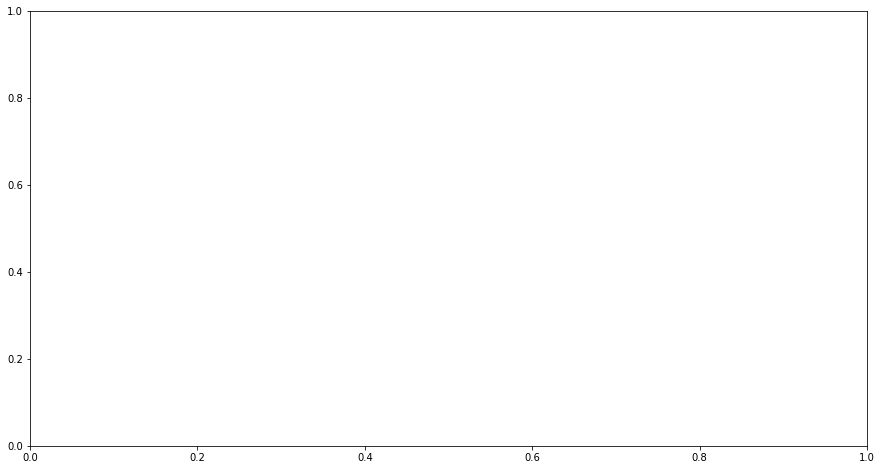

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_dats_c["Drift_Rate "]
binwidth = (max(data)-min(data))/50  
limit = max(abs(min(data)),max(data))
bins=binit(limit, binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)
ymax = int(max(ax.get_yticks()))
ymin = int(min(ax.get_yticks()))
BaryDrifts = [-d for d in BaryDriftRates_c]
plt.vlines(BaryDrifts,ymin,ymax,linestyle='dashed',color=secondary_color,zorder=50)
# for drift in BaryDrifts:
#     plt.bar(drift,ymax,width=drift*0.2,alpha=0.1,color='green',edgecolor='black')

ax.xaxis.set_major_locator(MultipleLocator(binwidth*4))
ax.xaxis.set_minor_locator(MultipleLocator(binwidth))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='y', which='major', color='black', linestyle='dotted')
ax.set_yscale('log')
ax.set_ylim(0.9,ymax)

plt.xlabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('C Band, SNR Minimum 10, Filter Threshold 1, Drift Factor 1.1', fontsize=20, y=0.92)
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_c_mask.DriftRate
binwidth = (max(data)-min(data))/50  
limit = max(abs(min(data)),max(data))
bins=binit(limit, binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)
ymax = int(max(ax.get_yticks()))
ymin = int(min(ax.get_yticks()))
BaryDrifts = [-d for d in BaryDriftRates_c]
plt.vlines(BaryDrifts,ymin,ymax,linestyle='dashed',color=secondary_color,zorder=50)
# for drift in BaryDrifts:
#     plt.bar(drift,ymax,width=drift*0.2,alpha=0.1,color='green',edgecolor='black')

ax.xaxis.set_major_locator(MultipleLocator(binwidth*4))
ax.xaxis.set_minor_locator(MultipleLocator(binwidth))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='y', which='major', color='black', linestyle='dotted')
ax.set_yscale('log')
ax.set_ylim(0.9,ymax)

plt.xlabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('C Band, SNR Minimum 10, Filter Threshold 1, Drift Factor 1.1, RFI Combs Removed', fontsize=20, y=0.92)
plt.show()

#### Filter Threshold 2:

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f2_c.DriftRate
binwidth = (max(data)-min(data))/25  
limit = max(abs(min(data)),max(data))
bins=binit(limit, binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)
ymax = int(max(ax.get_yticks()))
ymin = int(min(ax.get_yticks()))
BaryDrifts = [-d for d in BaryDriftRates_c]
plt.vlines(BaryDrifts,ymin,ymax,linestyle='dashed',color=secondary_color,zorder=50)
# for drift in BaryDrifts:
#     plt.bar(drift,ymax,width=drift*0.2,alpha=0.2,color='green',edgecolor='black')

ax.xaxis.set_major_locator(MultipleLocator(binwidth*4))
ax.xaxis.set_minor_locator(MultipleLocator(binwidth))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='y', which='major', color='black', linestyle='dotted')
# ax.set_yscale('log')
ax.set_ylim(0,ymax)

plt.xlabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('C Band, SNR Minimum 10, Filter Threshold 2, Drift Factor 1.1', fontsize=20, y=0.92)
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f2_c_mask.DriftRate
binwidth = (max(data)-min(data))/25  
limit = max(abs(min(data)),max(data))
bins=binit(limit, binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)
ymax = int(max(ax.get_yticks()))
ymin = int(min(ax.get_yticks()))
BaryDrifts = [-d for d in BaryDriftRates_c]
plt.vlines(BaryDrifts,ymin,ymax,linestyle='dashed',color=secondary_color,zorder=50)
# for drift in BaryDrifts:
#     plt.bar(drift,ymax,width=drift*0.2,alpha=0.2,color='green',edgecolor='black')

ax.xaxis.set_major_locator(MultipleLocator(binwidth*4))
ax.xaxis.set_minor_locator(MultipleLocator(binwidth))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='y', which='major', color='black', linestyle='dotted')
# ax.set_yscale('log')
ax.set_ylim(0,ymax)

plt.xlabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('C Band, SNR Minimum 10, Filter Threshold 2, Drift Factor 1.1, RFI Combs Removed', fontsize=20, y=0.92)
plt.show()

## L Band Drift Rate Counts

#### Filter Threshold 1:

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_L.DriftRate
binwidth = (max(data)-min(data))/30  
limit = max(abs(min(data)),max(data))
bins=binit(limit, binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)
ymax = int(max(ax.get_yticks()))
ymin = int(min(ax.get_yticks()))
BaryDrifts = [-d for d in BaryDriftRates_L]
plt.vlines(BaryDrifts,ymin,ymax,linestyle='dashed',color=secondary_color,zorder=50)
# for drift in BaryDrifts:
#     plt.bar(drift,ymax,width=drift*0.2,alpha=0.2,color='green',edgecolor='black')

ax.xaxis.set_major_locator(MultipleLocator(binwidth*4))
ax.xaxis.set_minor_locator(MultipleLocator(binwidth))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='y', which='major', color='black', linestyle='dotted')
ax.set_yscale('log')
ax.set_ylim(0.9,ymax)

plt.xlabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('X Band, SNR Minimum 10, Filter Threshold 1', fontsize=20, y=0.92)
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_L_mask.DriftRate
binwidth = (max(data)-min(data))/30  
limit = max(abs(min(data)),max(data))
bins=binit(limit, binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)
ymax = int(max(ax.get_yticks()))
ymin = int(min(ax.get_yticks()))
BaryDrifts = [-d for d in BaryDriftRates_L]
plt.vlines(BaryDrifts,ymin,ymax,linestyle='dashed',color=secondary_color,zorder=50)
# for drift in BaryDrifts:
#     plt.bar(drift,ymax,width=drift*0.2,alpha=0.2,color='green',edgecolor='black')

ax.xaxis.set_major_locator(MultipleLocator(binwidth*4))
ax.xaxis.set_minor_locator(MultipleLocator(binwidth))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='y', which='major', color='black', linestyle='dotted')
ax.set_yscale('log')
ax.set_ylim(0.9,ymax)

plt.xlabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('X Band, SNR Minimum 10, Filter Threshold 1, RFI Combs Removed', fontsize=20, y=0.92)
plt.show()

#### Filter Threshold 2:

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f2_L.DriftRate
binwidth = (max(data)-min(data))/30  
limit = max(abs(min(data)),max(data))
bins=binit(limit, binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)
ymax = int(max(ax.get_yticks()))
ymin = int(min(ax.get_yticks()))
BaryDrifts = [-d for d in BaryDriftRates_L]
plt.vlines(BaryDrifts,ymin,ymax,linestyle='dashed',color=secondary_color,zorder=50)
# for drift in BaryDrifts:
#     plt.bar(drift,ymax,width=drift*0.2,alpha=0.2,color='green',edgecolor='black')

ax.xaxis.set_major_locator(MultipleLocator(binwidth*8))
ax.xaxis.set_minor_locator(MultipleLocator(binwidth))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='y', which='major', color='black', linestyle='dotted')
ax.set_yscale('log')
ax.set_ylim(0.9,ymax)

plt.xlabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('X Band, SNR Minimum 10, Filter Threshold 2', fontsize=20, y=0.92)
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f2_L_mask.DriftRate
binwidth = (max(data)-min(data))/30  
limit = max(abs(min(data)),max(data))
bins=binit(limit, binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)
ymax = int(max(ax.get_yticks()))
ymin = int(min(ax.get_yticks()))
BaryDrifts = [-d for d in BaryDriftRates_L]
plt.vlines(BaryDrifts,ymin,ymax,linestyle='dashed',color=secondary_color,zorder=50)
# for drift in BaryDrifts:
#     plt.bar(drift,ymax,width=drift*0.2,alpha=0.2,color='green',edgecolor='black')

ax.xaxis.set_major_locator(MultipleLocator(binwidth*8))
ax.xaxis.set_minor_locator(MultipleLocator(binwidth))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='y', which='major', color='black', linestyle='dotted')
ax.set_yscale('log')
ax.set_ylim(0.9,ymax)

plt.xlabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('X Band, SNR Minimum 10, Filter Threshold 2, RFI Combs Removed', fontsize=20, y=0.92)
plt.show()

# Frequency Histograms

## S Band Frequencies

S band is 2 to 4 GHz.

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_s.Freq
binwidth = (max(data)-min(data))/50  
bins=np.arange(min(data), max(data), binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)

ax.xaxis.set_major_locator(MultipleLocator(250))
ax.xaxis.set_minor_locator(MultipleLocator(50))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
ax.set_xlim(1500,3250)
ax.set_yscale('log')

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('S Band, SNR Minimum 10, Filter Threshold 1', fontsize=20, y=0.92)
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_s_mask.Freq
binwidth = (max(data)-min(data))/50  
bins=np.arange(min(data), max(data), binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)

ax.xaxis.set_major_locator(MultipleLocator(250))
ax.xaxis.set_minor_locator(MultipleLocator(50))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
ax.set_xlim(1500,3250)
# ax.set_yscale('log')

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('S Band, SNR Minimum 10, Filter Threshold 1, Comb RFI Removed', fontsize=20, y=0.92)
plt.show()

#### Filter Threshold 2

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f2_s_mask.Freq
binwidth = (max(data)-min(data))/50  
bins=np.arange(min(data), max(data), binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)

ax.xaxis.set_major_locator(MultipleLocator(250))
ax.xaxis.set_minor_locator(MultipleLocator(50))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
ax.set_xlim(1500,3250)
# ax.set_yscale('log')

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('S Band, SNR Minimum 10, Filter Threshold 2, Comb RFI Removed', fontsize=20, y=0.92)
plt.show()

## C Band Frequencies

C band is 4 to 8 GHz.

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_c.Freq
binwidth = (max(data)-min(data))/50  
bins=np.arange(min(data), max(data), binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
ax.set_xlim(3000,9000)
ax.set_yscale('log')

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('C Band, SNR Minimum 10, Filter Threshold 1, Drift Factor 1.1', fontsize=20, y=0.92)
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_c_mask.Freq
binwidth = (max(data)-min(data))/50  
bins=np.arange(min(data), max(data), binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
ax.set_xlim(3000,9000)
# ax.set_yscale('log')

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('C Band, SNR Minimum 10, Filter Threshold 1, Drift Factor 1.1, RFI Combs Removed', fontsize=20, y=0.92)
plt.show()

#### Filter Threshold 2

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f2_c.Freq
binwidth = (max(data)-min(data))/50  
bins=np.arange(min(data), max(data), binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
ax.set_xlim(3000,9000)
# ax.set_yscale('log')

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('C Band, SNR Minimum 10, Filter Threshold 2, Drift Factor 1.3, RFI Combs Removed', fontsize=20, y=0.92)
plt.show()

## L Band Frequencies

L band is 1 to 2 GHz.

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_L.Freq
binwidth = (max(data)-min(data))/30  
bins=np.arange(min(data), max(data), binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
ax.set_xlim(500,2500)
ax.set_yscale('log')

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('X Band, SNR Minimum 10, Filter Threshold 1', fontsize=20, y=0.92)
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_L_mask.Freq
binwidth = (max(data)-min(data))/30  
bins=np.arange(min(data), max(data), binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
ax.set_xlim(500,2500)
# ax.set_yscale('log')

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('X Band, SNR Minimum 10, Filter Threshold 1, RFI Combs Removed', fontsize=20, y=0.92)
plt.show()

#### Filter Threshold 2

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f2_L_mask.Freq
binwidth = (max(data)-min(data))/30  
bins=np.arange(min(data), max(data), binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
ax.set_xlim(500,2500)
# ax.set_yscale('log')

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('X Band, SNR Minimum 10, Filter Threshold 2, RFI Combs Removed', fontsize=20, y=0.92)
plt.show()

# SNR Histograms

## S Band

In [ ]:
data=sorted(df_f1_s.SNR)
signal_groups=dict(enumerate(grouper(data,100), 0))
signal_groups.keys()
for key in signal_groups.keys():
    print(key, max(signal_groups[key]),len(signal_groups[key]))

In [ ]:
data=sorted(df_f1_c.SNR)
signal_groups=dict(enumerate(grouper(data,100), 0))
signal_groups.keys()
for key in signal_groups.keys():
    print(key, max(signal_groups[key]),len(signal_groups[key]))

In [ ]:
data=sorted(df_f1_L.SNR)
signal_groups=dict(enumerate(grouper(data,100), 0))
signal_groups.keys()
for key in signal_groups.keys():
    print(key, max(signal_groups[key]),len(signal_groups[key]))

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_s.SNR
signal_groups=grouper(data,100)
binwidth = (max(data)-min(data))/100
bins=np.arange(min(data), max(data), binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)

ax.xaxis.set_major_locator(MultipleLocator(50000))
ax.xaxis.set_minor_locator(MultipleLocator(10000))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
ax.set_xlim(0,250000)
ax.set_ylim(1,3*10**4)
ax.set_yscale('log')

plt.xlabel('SNR', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('S Band, SNR Minimum 10, Filter Threshold 1', fontsize=20, y=0.92)
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_s_mask.SNR
binwidth = (max(data)-min(data))/100
bins=np.arange(min(data), max(data), binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)

# ax.xaxis.set_major_locator(MultipleLocator(50000))
# ax.xaxis.set_minor_locator(MultipleLocator(10000))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
# ax.set_xlim(0,250000)
# ax.set_ylim(0.9,2*10**3)
# ax.set_yscale('log')

plt.xlabel('SNR', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('S Band, SNR Minimum 10, Filter Threshold 1, Comb RFI Removed', fontsize=20, y=0.92)
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_s_mask.SNR
binwidth = (max(data)-min(data))/400
bins=np.arange(min(data), max(data), binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)

# ax.xaxis.set_major_locator(MultipleLocator(1000))
# ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
# ax.set_xlim(0,15000)
# ax.set_ylim(0.9,2*10**2)
# ax.set_yscale('log')

plt.xlabel('SNR', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('S Band, SNR Minimum 10, Filter Threshold 1', fontsize=20, y=0.92)
plt.show()

## C Band

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_c.SNR
binwidth = (max(data)-min(data))/100
bins=np.arange(min(data), max(data), binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)

ax.xaxis.set_major_locator(MultipleLocator(50000))
ax.xaxis.set_minor_locator(MultipleLocator(10000))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
ax.set_xlim(0,300000)
ax.set_ylim(1,2*10**3)
ax.set_yscale('log')

plt.xlabel('SNR', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('C Band, SNR Minimum 10, Filter Threshold 1, Drift Factor 1.1', fontsize=20, y=0.92)
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_c.SNR
binwidth = (max(data)-min(data))/100
bins=np.arange(min(data), max(data), binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)

# ax.xaxis.set_major_locator(MultipleLocator(500))
# ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
ax.set_xlim(0,50000)
ax.set_ylim(1,1*10**3)
ax.set_yscale('log')

plt.xlabel('SNR', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('C Band, SNR Minimum 10, Filter Threshold 1, Drift Factor 1.1', fontsize=20, y=0.92)
plt.show()

## L Band

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_L.SNR
binwidth = (max(data)-min(data))/100
bins=np.arange(min(data), max(data), binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)

ax.xaxis.set_major_locator(MultipleLocator(50000))
ax.xaxis.set_minor_locator(MultipleLocator(10000))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
ax.set_xlim(0,300000)
ax.set_ylim(1,2*10**3)
ax.set_yscale('log')
# ax.set_xscale('log')

plt.xlabel('SNR', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('X Band, SNR Minimum 10, Filter Threshold 1', fontsize=20, y=0.92)
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_L.SNR
binwidth = (max(data)-min(data))/1600
bins=np.arange(min(data), max(data), binwidth)

plt.hist(data,edgecolor='black',color=main_color,align='right',bins=bins,zorder=20)

ax.xaxis.set_major_locator(MultipleLocator(5000))
ax.xaxis.set_minor_locator(MultipleLocator(1000))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
ax.set_xlim(0,5000)
ax.set_ylim(1,3*10**4)
ax.set_yscale('log')
# ax.set_xscale('log')

plt.xlabel('SNR', fontsize=axis_label_size)
plt.ylabel('Number of Signals', fontsize=axis_label_size)
# fig.suptitle('X Band, SNR Minimum 10, Filter Threshold 1', fontsize=20, y=0.92)
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_s.Freq
binwidth = (max(data)-min(data))/50  
bins=np.arange(min(data), max(data), binwidth)

# plt.hist(data,edgecolor='black',color='goldenrod',align='right',bins=bins,zorder=20)

heatmap, xedges, yedges = np.histogram2d(df_f1_s.Freq, df_f1_s.DriftRate, bins=bins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

# ax.xaxis.set_major_locator(MultipleLocator(250))
# ax.xaxis.set_minor_locator(MultipleLocator(50))

# ax.tick_params(which='major', length=10, width=2,labelsize=14)
# ax.tick_params(which='minor', length=5, color='blue', width=2,labelsize=14)
# plt.grid(axis='both', which='major', color='black', linestyle='dotted')
# ax.set_xlim(1500,4000)
# ax.set_yscale('log')

# plt.xlabel('Frequency (MHz)', fontsize=20)
# plt.ylabel('Number of Signals', fontsize=20)
# fig.suptitle('S Band, SNR Minimum 10, Filter Threshold 1', fontsize=20, y=0.92)
# plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
N_bins=50
X=df_f1_s.Freq
Y=df_f1_s.DriftRate
plt.hist2d(X,Y,bins=N_bins,density=True,cmap='YlGn',facecolor='white')
plt.show()

In [ ]:
"""
==============================
Create 3D histogram of 2D data
==============================

Demo of a histogram for 2 dimensional data as a bar graph in 3D.
"""
%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
x=df_f1_s.Freq
y=df_f1_s.DriftRate
hist, xedges, yedges = np.histogram2d(x, y, bins=50)

# Construct arrays for the anchor positions of the 16 bars.
# Note: np.meshgrid gives arrays in (ny, nx) so we use 'F' to flatten xpos,
# ypos in column-major order. For numpy >= 1.7, we could instead call meshgrid
# with indexing='ij'.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

plt.show()

# DR vs Freq

## S band

#### Filter Threshold 1

In [ ]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_s
X=data.Freq
Y=data.DriftRate
plt.scatter(X,Y,color=main_color)

ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(MultipleLocator(20))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='both', color='black', linestyle='dotted')
# ax.set_yscale('log')
ax.set_xlim(1650,3160)

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
# fig.suptitle('S Band, SNR Minimum 10, Filter Threshold 1', fontsize=20, y=0.92)
plt.show()

In [ ]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_s_mask
X=data.Freq
Y=data.DriftRate
plt.scatter(X,Y,color=main_color)

ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(MultipleLocator(25))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
# ax.set_yscale('log')
# ax.set_ylim(0.9,ymax)

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
# fig.suptitle('S Band, SNR Minimum 10, Filter Threshold 1, RFI Combs Removed', fontsize=20, y=0.92)
plt.show()

#### Filter Threshold 2

In [ ]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(15,8))

data=df_f2_s
X=data.Freq
Y=data.DriftRate
plt.scatter(X,Y,color=main_color)

ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(MultipleLocator(25))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
# ax.set_yscale('log')
# ax.set_ylim(0.9,ymax)

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
# fig.suptitle('S Band, SNR Minimum 10, Filter Threshold 2', fontsize=20, y=0.92)
plt.show()

In [ ]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(15,8))

data=df_f2_s_mask
X=data.Freq
Y=data.DriftRate
plt.scatter(X,Y,color=main_color)

ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(MultipleLocator(25))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
# ax.set_yscale('log')
# ax.set_ylim(0.9,ymax)

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
# fig.suptitle('S Band, SNR Minimum 10, Filter Threshold 2, Comb RFI Removed', fontsize=20, y=0.92)
plt.show()

## C band

#### Filter Threshold 1

In [ ]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_c
X=data.Freq
Y=data.DriftRate
plt.scatter(X,Y,color=main_color)

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
# ax.set_yscale('log')
# ax.set_ylim(0.9,ymax)

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
# fig.suptitle('C Band, SNR Minimum 10, Filter Threshold 1, Drift Factor 1.1', fontsize=20, y=0.92)
plt.show()

In [ ]:
def grouper(iterable,diff):
    prev = None
    group = []
    for item in iterable:
        if prev is None or abs(item - prev) <= diff:
            group.append(item)
        else:
            yield group
            group = [item]
        prev = item
    if group:
        yield group

In [ ]:
numbers = [float(F) for F in data.Freq]
clumps = dict(enumerate(grouper(numbers,10), 0))
len(clumps)

In [ ]:
max(clumps[0]),min(clumps[0])

In [ ]:
for c in clumps:
    x1 = min(clumps[c])
    x2 = max(clumps[c])
#     print(x1,x2)

In [ ]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_c
X=data.Freq
Y=data.DriftRate
plt.scatter(X,Y,color=main_color)

# ax.xaxis.set_major_locator(MultipleLocator(500))
# ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
numbers = [float(F) for F in data.Freq]
clumps = dict(enumerate(grouper(numbers,10), 0))
c_mask_min=[]
c_mask_max=[]
for c in clumps:
    if len(clumps[c])>10:
        c_mask_min.append(min(clumps[c]))
        c_mask_max.append(max(clumps[c]))
        x1 = min(clumps[c])
        x2 = max(clumps[c])
        ax.axvspan(x1, x2, alpha=0.1, color='red')

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
# fig.suptitle('C Band, SNR Minimum 10, Filter Threshold 1, Drift Factor 1.1', fontsize=20, y=0.92)
plt.show()

In [ ]:
len(c_mask_min)

#### Filter Threshold 2

In [ ]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(15,8))

data=df_f2_c
X=data.Freq
Y=data.DriftRate
plt.scatter(X,Y,color=main_color)

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
# ax.set_yscale('log')
# ax.set_ylim(0.9,ymax)

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
# fig.suptitle('C Band, SNR Minimum 10, Filter Threshold 2, Drift Factor 1.1', fontsize=20, y=0.92)
plt.show()

## L band

#### Filter Threshold 1

In [ ]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_L
X=data.Freq
Y=data.DriftRate
plt.scatter(X,Y,color=main_color)

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
# ax.set_yscale('log')
# ax.set_ylim(0.9,ymax)

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
# fig.suptitle('X Band, SNR Minimum 10, Filter Threshold 1', fontsize=20, y=0.92)
plt.show()

#### Filter Threshold 2

In [ ]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(15,8))

data=df_f2_L
X=data.Freq
Y=data.DriftRate
plt.scatter(X,Y,color=main_color)

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
# ax.set_yscale('log')
# ax.set_ylim(0.9,ymax)

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
# fig.suptitle('X Band, SNR Minimum 10, Filter Threshold 1', fontsize=20, y=0.92)
plt.show()

In [ ]:
import scipy.stats as st

# Extract x and y
data=df_f1_s
x=data.Freq
y=data.DriftRate

# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY

# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

# Fit KDE
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

# Plot
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel('Drift Rate (Hz/s)')
ax.set_zlabel('PDF')
ax.set_title('S Band, Filter Threshold 1, Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(25, 55)

In [ ]:
import scipy.stats as st

# Extract x and y
data=df_f1_s_mask
x=data.Freq
y=data.DriftRate

# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY

# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

# Fit KDE
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

# Plot
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel('Drift Rate (Hz/s)')
ax.set_zlabel('PDF')
ax.set_title('S Band, Filter Threshold 1, Comb RFI Removed, Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(25, 55)

In [ ]:
import scipy.stats as st

# Extract x and y
data=df_f1_c
x=data.Freq
y=data.DriftRate

# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY

# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

# Fit KDE
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

# Plot
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel('Drift Rate (Hz/s)')
ax.set_zlabel('PDF')
ax.set_title('C Band, Filter Threshold 1, Drift Factor 1.1, Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(25, 55)

In [ ]:
import scipy.stats as st

# Extract x and y
data=df_f1_L
x=data.Freq
y=data.DriftRate

# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY

# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

# Fit KDE
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

# Plot
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel('Drift Rate (Hz/s)')
ax.set_zlabel('PDF')
ax.set_title('X Band, Filter Threshold 1, Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(25, 55)

In [ ]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(15,8))

data=df_f1_L
L_mask_min=[]
L_mask_max=[]
X=data.Freq
Y=data.DriftRate
BaryDrifts = [-d for d in BaryDriftRates_L]
plt.scatter(X,Y,color=main_color,edgecolors='black')
for y in BaryDrifts:
    plt.axhline(y=y, color=secondary_color, linestyle='--',alpha=0.25)

# ax.xaxis.set_major_locator(MultipleLocator(500))
# ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(which='major', length=10, width=2,labelsize=tick_label_size)
ax.tick_params(which='minor', length=5, color=tick_color, width=2,labelsize=tick_label_size)
plt.grid(axis='both', which='major', color='black', linestyle='dotted')
numbers = [float(F) for F in data.Freq]
clumps = dict(enumerate(grouper(numbers,max(data.Freq)/1000), 0))
for c in clumps:
    if len(clumps[c])>=5:
        L_mask_min.append(min(clumps[c]))
        L_mask_max.append(max(clumps[c]))
        x1 = min(clumps[c])
        x2 = max(clumps[c])
        ax.axvspan(x1, x2, alpha=0.25, color=main_color)

plt.xlabel('Frequency (MHz)', fontsize=axis_label_size)
plt.ylabel('Drift Rate (Hz/s)', fontsize=axis_label_size)
ax.set_xlim(1595.214844-93.75,1595.214844+93.75)
# fig.suptitle('C Band, SNR Minimum 10, Filter Threshold 1, Drift Factor 1.1', fontsize=20, y=0.92)
plt.show()